In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=150,dpi_save=300,facecolor='white',fontsize=10,vector_friendly=True,figsize=(3,3))
sc.settings.verbosity = 3
import sys
sys.path.append("/home/qukun/xuhao/workspace/Utils")
import sc_plot
from sc_process import grouped_obs_mean
from sc_plot import plot_proportion
import palantir

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [3]:
cx_endo = sc.read_h5ad('../scripts/CX_20211030/s09_cx_endo.h5ad')

In [4]:
cx_endo.obs[['umap_1','umap_2']] = cx_endo.obsm['X_umap']

In [7]:
cx_endo

AnnData object with n_obs × n_vars = 4291 × 36601
    obs: 'sample', 'celltype_submarkers', 'celltype_major', 'celltype_minor', 'cli_state', 'umap_1', 'umap_2'
    var: 'features'
    uns: 'celltype_major_colors', 'celltype_minor_colors', 'neighbors'
    obsm: 'X_PCA', 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    layers: 'scaled'
    obsp: 'distances'

In [9]:
cx_endo.obs[['celltype_minor','cli_state','umap_1','umap_2']].to_csv('source_data/source_data_fig3ab.csv')

In [34]:
sc.pp.neighbors(cx_endo,use_rep='X_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:07)


In [35]:
sc.tl.umap(cx_endo)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


In [42]:
cx_endo.uns['celltype_minor_colors'] = ['#F7CCC9','#EEB477','#ED9693']

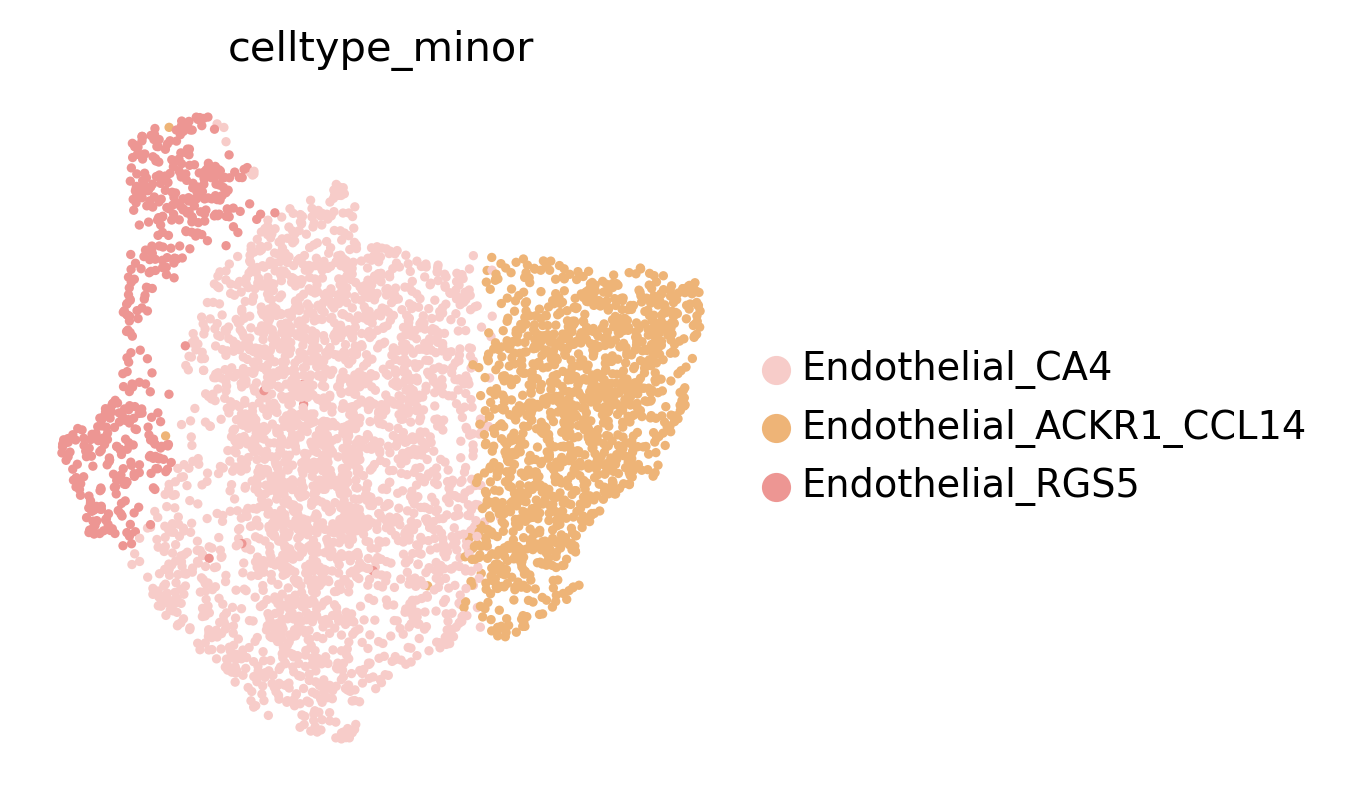

In [45]:
sc.pl.umap(cx_endo, color='celltype_minor',frameon=False,size=20,save='_cx_endo_celltype_minor_markers_reumap.pdf')

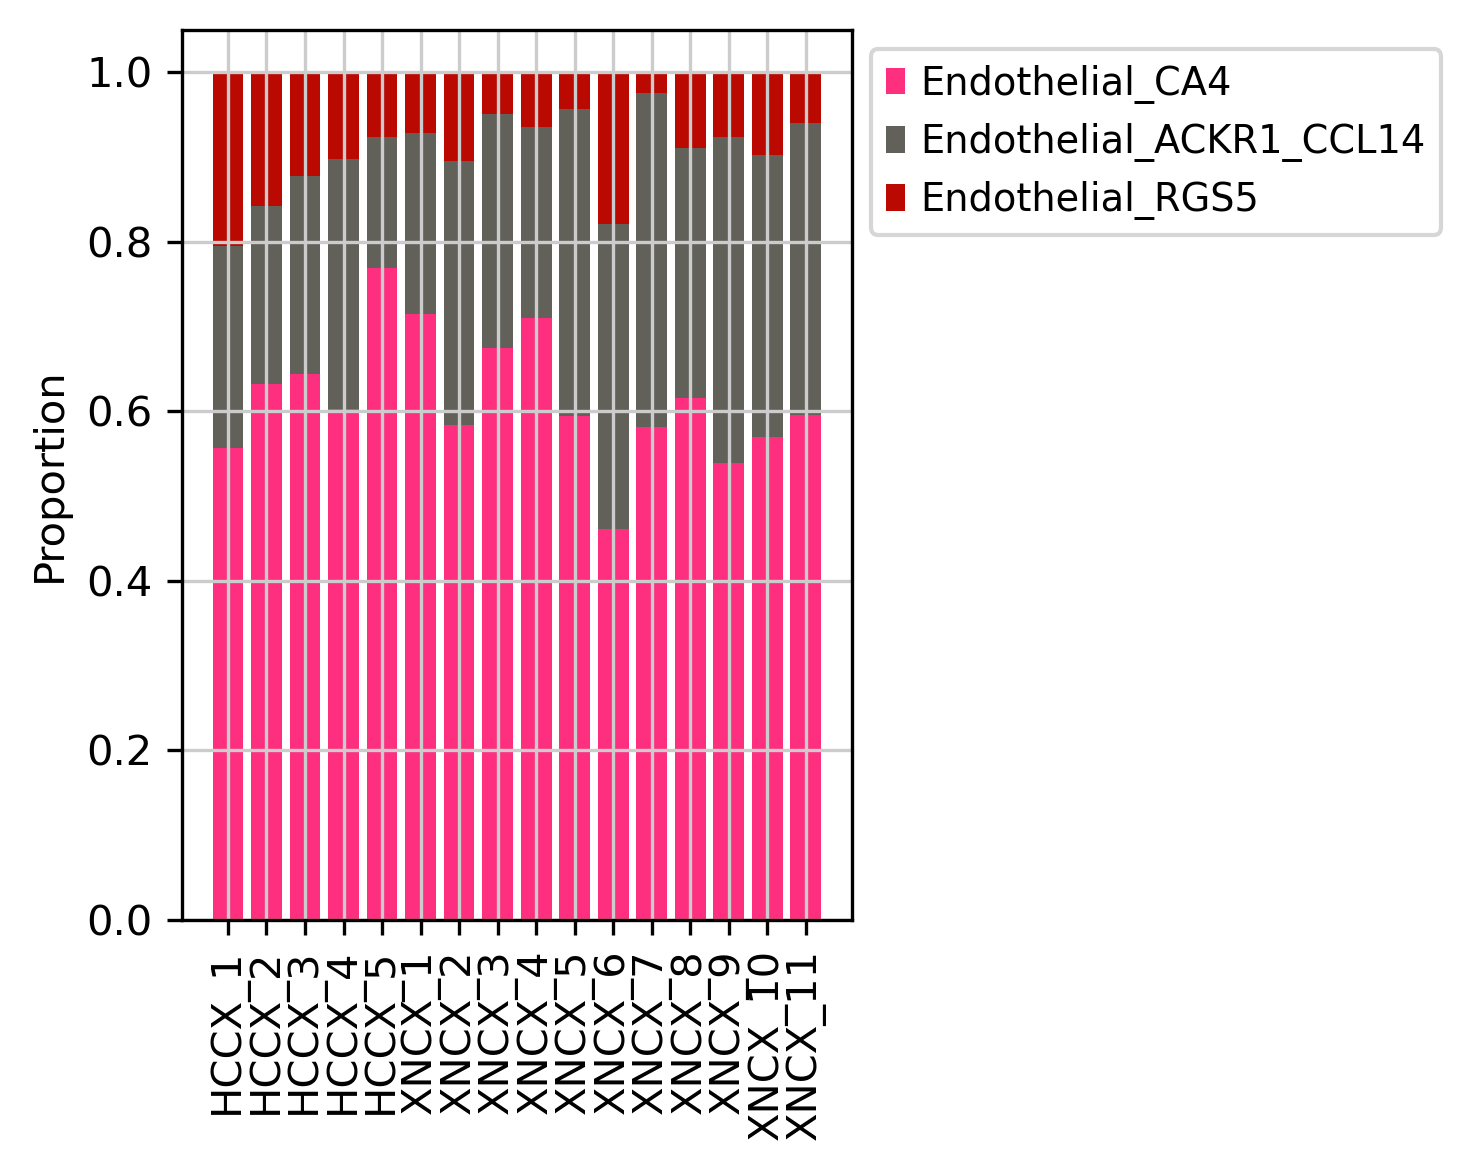

In [32]:
minor_p_df = plot_proportion(cx_endo.obs,obs_x='sample',obs_y='celltype_minor',obs_x_order=cx_endo.obs['sample'].cat.categories,obs_y_order=cx_endo.obs['celltype_minor'].cat.categories,colors=cx_endo.uns['celltype_minor_colors'],figsize=(5,4),save='cx_endo_results/cx_endo_celltype_minor_sample_proportion.pdf')

In [33]:
minor_p_df_count = pd.DataFrame()

count = 0
for i in minor_p_df.index:
    for c in minor_p_df.columns:
        minor_p_df_count.loc[count,['celltype_minor','sample','proportion']] = [i,c,minor_p_df.loc[i,c]]
        count += 1

minor_p_df_count.loc[minor_p_df_count['sample'].isin(['HCCX_1','HCCX_2','HCCX_3','HCCX_4','HCCX_5']),'cli_state'] = 'HC'
minor_p_df_count.loc[minor_p_df_count['sample'].isin(['XNCX_1','XNCX_2','XNCX_3','XNCX_4','XNCX_5','XNCX_6','XNCX_7','XNCX_8','XNCX_9','XNCX_10','XNCX_11']),'cli_state'] = 'SjS'

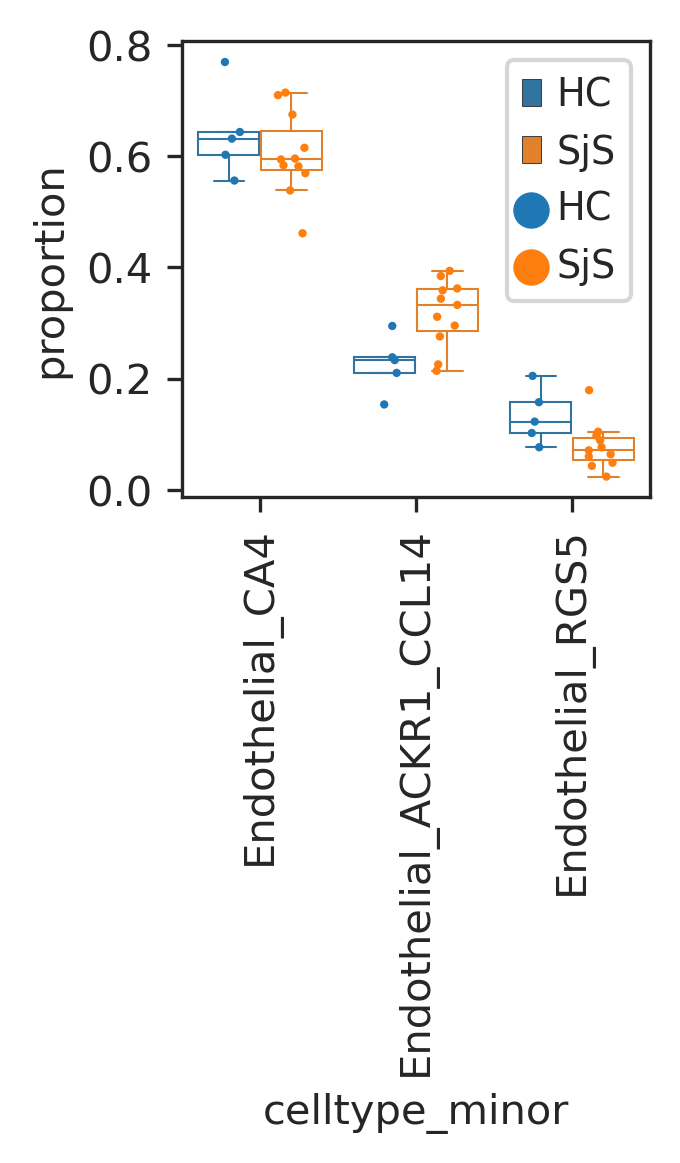

In [63]:
fig,ax=plt.subplots(figsize=(2,2))
sns.boxplot(data=minor_p_df_count,y='proportion',x='celltype_minor',hue='cli_state',ax=ax,fliersize=0,linewidth=0.5,width=0.8)
sns.stripplot(data=minor_p_df_count,y='proportion',x='celltype_minor',hue='cli_state',ax=ax,dodge=True,size=1.5,linewidth=0.5,jitter=0.2)
plt.xticks(rotation=90)
# box lines
for i, box in enumerate(ax.artists):
    color = box.get_facecolor()
    box.set_edgecolor(color)
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i, 6*(i+1)):
        ax.lines[j].set_color(color)

# scatter points
for coll in ax.collections:
    color = coll.get_facecolor()
    coll.set_edgecolor(color)
    coll.set_facecolor(color)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('cx_endo_results/boxplot_cx_endo_celltype_minor_proportion.pdf',bbox_inches='tight')
plt.show()

In [10]:
cx_endo_cli_state_df = []
for c in cx_endo.obs.celltype_minor.unique():
    cx_endo_ctmp = cx_endo[cx_endo.obs.celltype_minor==c].copy()
    sc.tl.rank_genes_groups(cx_endo_ctmp,groupby='cli_state',key_added=f'{c}_cli',method='wilcoxon',pts=True,use_raw=False)
    cx_endo_ctmp_df = sc.get.rank_genes_groups_df(cx_endo_ctmp,group='SjS',key=f'{c}_cli')
#     cx_endo_ctmp_df = cx_endo_ctmp_df[(cx_endo_ctmp_df['logfoldchanges'] > 0.5) | (cx_endo_ctmp_df['logfoldchanges'] < -0.5)]
    # cx_endo_ctmp_df = cx_endo_ctmp_df[cx_endo_ctmp_df['pct_nz_group'] > 0.1]
    cx_endo_ctmp_df['celltype_minor'] = c
    cx_endo_cli_state_df.append(cx_endo_ctmp_df)

ranking genes
    finished: added to `.uns['Endothelial_ACKR1_CCL14_cli']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:20)
ranking genes
    finished: added to `.uns['Endothelial_CA4_cli']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)
ranking genes
    finished: added to `.uns['Endothelial_RGS5_cli']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.r

In [11]:
cx_endo_cli_state_df = pd.concat(cx_endo_cli_state_df,axis=0)

In [18]:
endo_ackr1_cli_state_degs = cx_endo_cli_state_df[cx_endo_cli_state_df.celltype_minor == 'Endothelial_ACKR1_CCL14']
endo_ackr1_cli_state_degs['logpvals'] = -np.log10(endo_ackr1_cli_state_degs['pvals_adj'])
endo_ackr1_cli_state_degs.loc[endo_ackr1_cli_state_degs['logpvals'] == np.inf,'logpvals'] = 300
endo_ackr1_cli_state_degs = endo_ackr1_cli_state_degs[endo_ackr1_cli_state_degs['pct_nz_group'] > 0.1]
endo_ackr1_cli_state_degs = endo_ackr1_cli_state_degs[endo_ackr1_cli_state_degs['pvals_adj'] < 0.01]
endo_ackr1_cli_state_degs['color'] = '#808080'
endo_ackr1_cli_state_degs.loc[(endo_ackr1_cli_state_degs['logfoldchanges'] >= 0.5)&((endo_ackr1_cli_state_degs['pvals_adj'] < 0.01)),'color'] = matplotlib.colors.to_hex(sns.color_palette(n_colors=2)[1])
endo_ackr1_cli_state_degs.loc[(endo_ackr1_cli_state_degs['logfoldchanges'] <= -0.5)&((endo_ackr1_cli_state_degs['pvals_adj'] < 0.01)),'color'] = matplotlib.colors.to_hex(sns.color_palette(n_colors=2)[0])

endo_ca4_cli_state_degs = cx_endo_cli_state_df[cx_endo_cli_state_df.celltype_minor == 'Endothelial_CA4']
endo_ca4_cli_state_degs['logpvals'] = -np.log10(endo_ca4_cli_state_degs['pvals_adj'])
endo_ca4_cli_state_degs.loc[endo_ca4_cli_state_degs['logpvals'] == np.inf,'logpvals'] = 300
endo_ca4_cli_state_degs = endo_ca4_cli_state_degs[endo_ca4_cli_state_degs['pct_nz_group'] > 0.1]
endo_ca4_cli_state_degs = endo_ca4_cli_state_degs[endo_ca4_cli_state_degs['pvals_adj'] < 0.01]
endo_ca4_cli_state_degs['color'] = '#808080'
endo_ca4_cli_state_degs.loc[(endo_ca4_cli_state_degs['logfoldchanges'] >= 0.5)&((endo_ca4_cli_state_degs['pvals_adj'] < 0.01)),'color'] = matplotlib.colors.to_hex(sns.color_palette(n_colors=2)[1])
endo_ca4_cli_state_degs.loc[(endo_ca4_cli_state_degs['logfoldchanges'] <= -0.5)&((endo_ca4_cli_state_degs['pvals_adj'] < 0.01)),'color'] = matplotlib.colors.to_hex(sns.color_palette(n_colors=2)[0])

endo_rgs5_cli_state_degs = cx_endo_cli_state_df[cx_endo_cli_state_df.celltype_minor == 'Endothelial_RGS5']
endo_rgs5_cli_state_degs['logpvals'] = -np.log10(endo_rgs5_cli_state_degs['pvals_adj'])
endo_rgs5_cli_state_degs.loc[endo_rgs5_cli_state_degs['logpvals'] == np.inf,'logpvals'] = 300
endo_rgs5_cli_state_degs = endo_rgs5_cli_state_degs[endo_rgs5_cli_state_degs['pct_nz_group'] > 0.1]
endo_rgs5_cli_state_degs = endo_rgs5_cli_state_degs[endo_rgs5_cli_state_degs['pvals_adj'] < 0.01]
endo_rgs5_cli_state_degs['color'] = '#808080'
endo_rgs5_cli_state_degs.loc[(endo_rgs5_cli_state_degs['logfoldchanges'] >= 0.5)&((endo_rgs5_cli_state_degs['pvals_adj'] < 0.01)),'color'] = matplotlib.colors.to_hex(sns.color_palette(n_colors=2)[1])
endo_rgs5_cli_state_degs.loc[(endo_rgs5_cli_state_degs['logfoldchanges'] <= -0.5)&((endo_rgs5_cli_state_degs['pvals_adj'] < 0.01)),'color'] = matplotlib.colors.to_hex(sns.color_palette(n_colors=2)[0])

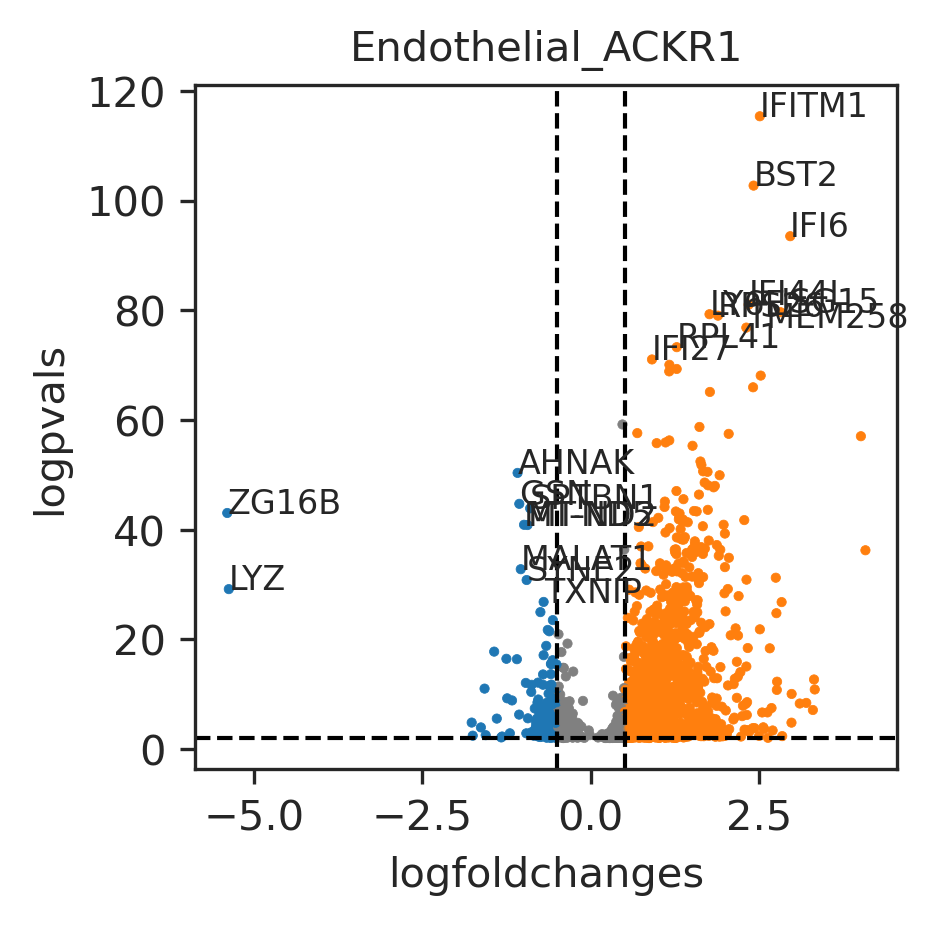

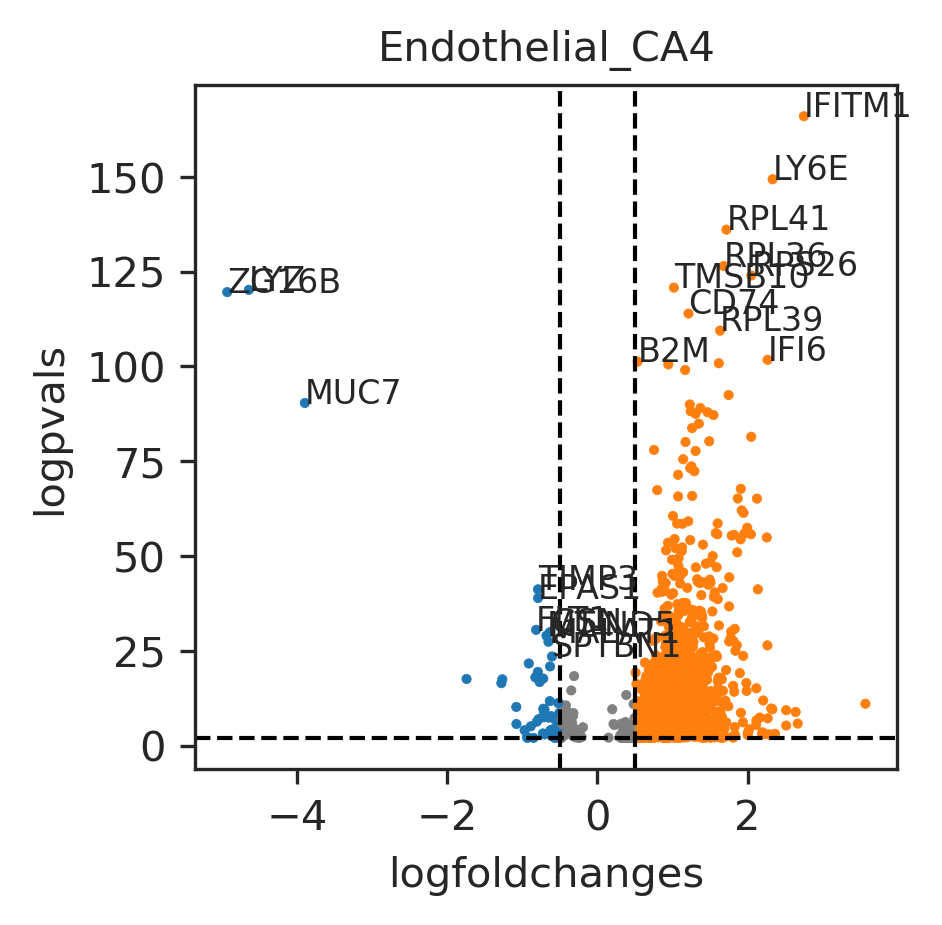

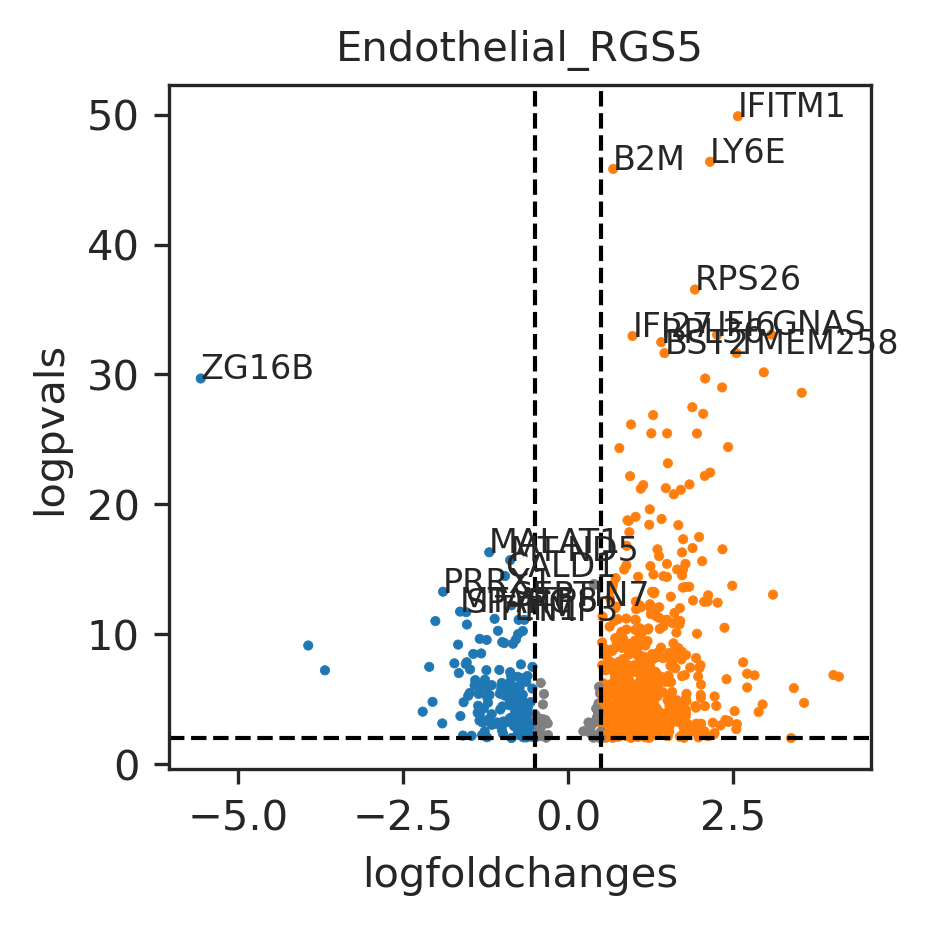

In [23]:
sns.set_style('ticks')
sns.scatterplot(x=endo_ackr1_cli_state_degs['logfoldchanges'],y=endo_ackr1_cli_state_degs['logpvals'],c=endo_ackr1_cli_state_degs['color'],edgecolor=None,s=5)
plt.axvline(x=0.5,linewidth=1,linestyle='--',color='black')
plt.axvline(x=-0.5,linewidth=1,linestyle='--',color='black')
plt.axhline(y=2,linewidth=1,linestyle='--',color='black')
plt.title('Endothelial_ACKR1')
for ind in endo_ackr1_cli_state_degs.loc[(np.abs(endo_ackr1_cli_state_degs['logfoldchanges']) >= 0.5)&((endo_ackr1_cli_state_degs['pvals_adj'] < 0.01)),:].head(10).index:
    plt.text(x=endo_ackr1_cli_state_degs.loc[ind,'logfoldchanges'],y=endo_ackr1_cli_state_degs.loc[ind,'logpvals'],s=endo_ackr1_cli_state_degs.loc[ind,'names'],fontsize=8)
for ind in endo_ackr1_cli_state_degs.loc[(np.abs(endo_ackr1_cli_state_degs['logfoldchanges']) >= 0.5)&((endo_ackr1_cli_state_degs['pvals_adj'] < 0.01)),:].tail(10).index:
    plt.text(x=endo_ackr1_cli_state_degs.loc[ind,'logfoldchanges'],y=endo_ackr1_cli_state_degs.loc[ind,'logpvals'],s=endo_ackr1_cli_state_degs.loc[ind,'names'],fontsize=8)
plt.savefig('figures/vocanoplot_scatterplot_cx_endo_ackr1_vocanoplot.pdf',bbox_inches='tight')
plt.show()

sns.set_style('ticks')
sns.scatterplot(x=endo_ca4_cli_state_degs['logfoldchanges'],y=endo_ca4_cli_state_degs['logpvals'],c=endo_ca4_cli_state_degs['color'],edgecolor=None,s=5)
plt.axvline(x=0.5,linewidth=1,linestyle='--',color='black')
plt.axvline(x=-0.5,linewidth=1,linestyle='--',color='black')
plt.axhline(y=2,linewidth=1,linestyle='--',color='black')
plt.title('Endothelial_CA4')
for ind in endo_ca4_cli_state_degs.loc[(np.abs(endo_ca4_cli_state_degs['logfoldchanges']) >= 0.5)&((endo_ca4_cli_state_degs['pvals_adj'] < 0.01)),:].head(10).index:
    plt.text(x=endo_ca4_cli_state_degs.loc[ind,'logfoldchanges'],y=endo_ca4_cli_state_degs.loc[ind,'logpvals'],s=endo_ca4_cli_state_degs.loc[ind,'names'],fontsize=8)
for ind in endo_ca4_cli_state_degs.loc[(np.abs(endo_ca4_cli_state_degs['logfoldchanges']) >= 0.5)&((endo_ca4_cli_state_degs['pvals_adj'] < 0.01)),:].tail(10).index:
    plt.text(x=endo_ca4_cli_state_degs.loc[ind,'logfoldchanges'],y=endo_ca4_cli_state_degs.loc[ind,'logpvals'],s=endo_ca4_cli_state_degs.loc[ind,'names'],fontsize=8)
plt.savefig('figures/vocanoplot_scatterplot_cx_endo_ca4_vocanoplot.pdf',bbox_inches='tight')
plt.show()

sns.set_style('ticks')
sns.scatterplot(x=endo_rgs5_cli_state_degs['logfoldchanges'],y=endo_rgs5_cli_state_degs['logpvals'],c=endo_rgs5_cli_state_degs['color'],edgecolor=None,s=5)
plt.axvline(x=0.5,linewidth=1,linestyle='--',color='black')
plt.axvline(x=-0.5,linewidth=1,linestyle='--',color='black')
plt.axhline(y=2,linewidth=1,linestyle='--',color='black')
plt.title('Endothelial_RGS5')
for ind in endo_rgs5_cli_state_degs.loc[(np.abs(endo_rgs5_cli_state_degs['logfoldchanges']) >= 0.5)&((endo_rgs5_cli_state_degs['pvals_adj'] < 0.01)),:].head(10).index:
    plt.text(x=endo_rgs5_cli_state_degs.loc[ind,'logfoldchanges'],y=endo_rgs5_cli_state_degs.loc[ind,'logpvals'],s=endo_rgs5_cli_state_degs.loc[ind,'names'],fontsize=8)
for ind in endo_rgs5_cli_state_degs.loc[(np.abs(endo_rgs5_cli_state_degs['logfoldchanges']) >= 0.5)&((endo_rgs5_cli_state_degs['pvals_adj'] < 0.01)),:].tail(10).index:
    plt.text(x=endo_rgs5_cli_state_degs.loc[ind,'logfoldchanges'],y=endo_rgs5_cli_state_degs.loc[ind,'logpvals'],s=endo_rgs5_cli_state_degs.loc[ind,'names'],fontsize=8)
plt.savefig('figures/vocanoplot_scatterplot_cx_endo_rgs5al_vocanoplot.pdf',bbox_inches='tight')
plt.show()

In [12]:
cx_endo_cli_state_df_filter = cx_endo_cli_state_df[(np.abs(cx_endo_cli_state_df.logfoldchanges) > .5)&(cx_endo_cli_state_df.pvals_adj < .01)&(cx_endo_cli_state_df.pct_nz_group > .1)]
# cx_endo_cli_state_df_filter.to_csv('cx_endo_results/cx_endo_cli_state_degs_filter.csv')

In [14]:
cx_endo_cli_state_df_filter.to_csv('source_data/source_data_fig3c&d.csv')

In [4]:
cx_endo_cli_state_df = pd.concat(cx_endo_cli_state_df,axis=0)
cx_endo_cli_state_logfc = pd.DataFrame(index=cx_endo_cli_state_df.celltype_minor.unique(),columns=cx_endo_cli_state_df.names.unique())
cx_endo_cli_state_pval = pd.DataFrame(index=cx_endo_cli_state_df.celltype_minor.unique(),columns=cx_endo_cli_state_df.names.unique())
cx_endo_cli_state_pts = pd.DataFrame(index=cx_endo_cli_state_df.celltype_minor.unique(),columns=cx_endo_cli_state_df.names.unique())
for c in cx_endo_cli_state_df.celltype_minor.unique():
    cx_endo_cli_state_df_tmp = cx_endo_cli_state_df[cx_endo_cli_state_df.celltype_minor == c]
    cx_endo_cli_state_logfc.loc[c,cx_endo_cli_state_df_tmp.names] = cx_endo_cli_state_df_tmp.logfoldchanges.values
    cx_endo_cli_state_pval.loc[c,cx_endo_cli_state_df_tmp.names] = cx_endo_cli_state_df_tmp.pvals_adj.values
    cx_endo_cli_state_pts.loc[c,cx_endo_cli_state_df_tmp.names] = cx_endo_cli_state_df_tmp.pct_nz_group.values
cx_endo_cli_state_logfc = cx_endo_cli_state_logfc.fillna(0)
cx_endo_cli_state_pval = cx_endo_cli_state_pval.fillna(0)
cx_endo_cli_state_pts = cx_endo_cli_state_pts.fillna(0)

In [5]:
cx_endo_cli_state_up_logfc = cx_endo_cli_state_logfc.loc[:,(((cx_endo_cli_state_pts.values > 0.1)&(cx_endo_cli_state_logfc.values > 1)&(cx_endo_cli_state_pval.values < 0.01)).sum(0) != 0)]
cx_endo_cli_state_down_logfc = cx_endo_cli_state_logfc.loc[:,(((cx_endo_cli_state_pts.values > 0.1)&(cx_endo_cli_state_logfc.values < -1)&(cx_endo_cli_state_pval.values < 0.01)).sum(0) != 0)]
cx_endo_cli_state_up_logfc = cx_endo_cli_state_up_logfc*(cx_endo_cli_state_pval.loc[:,cx_endo_cli_state_up_logfc.columns].values < 0.01)
cx_endo_cli_state_down_logfc = cx_endo_cli_state_down_logfc*(cx_endo_cli_state_pval.loc[:,cx_endo_cli_state_down_logfc.columns].values < 0.01)

In [12]:
cx_endo_cli_state_all_logfc = pd.concat([cx_endo_cli_state_up_logfc,cx_endo_cli_state_down_logfc],axis=1)

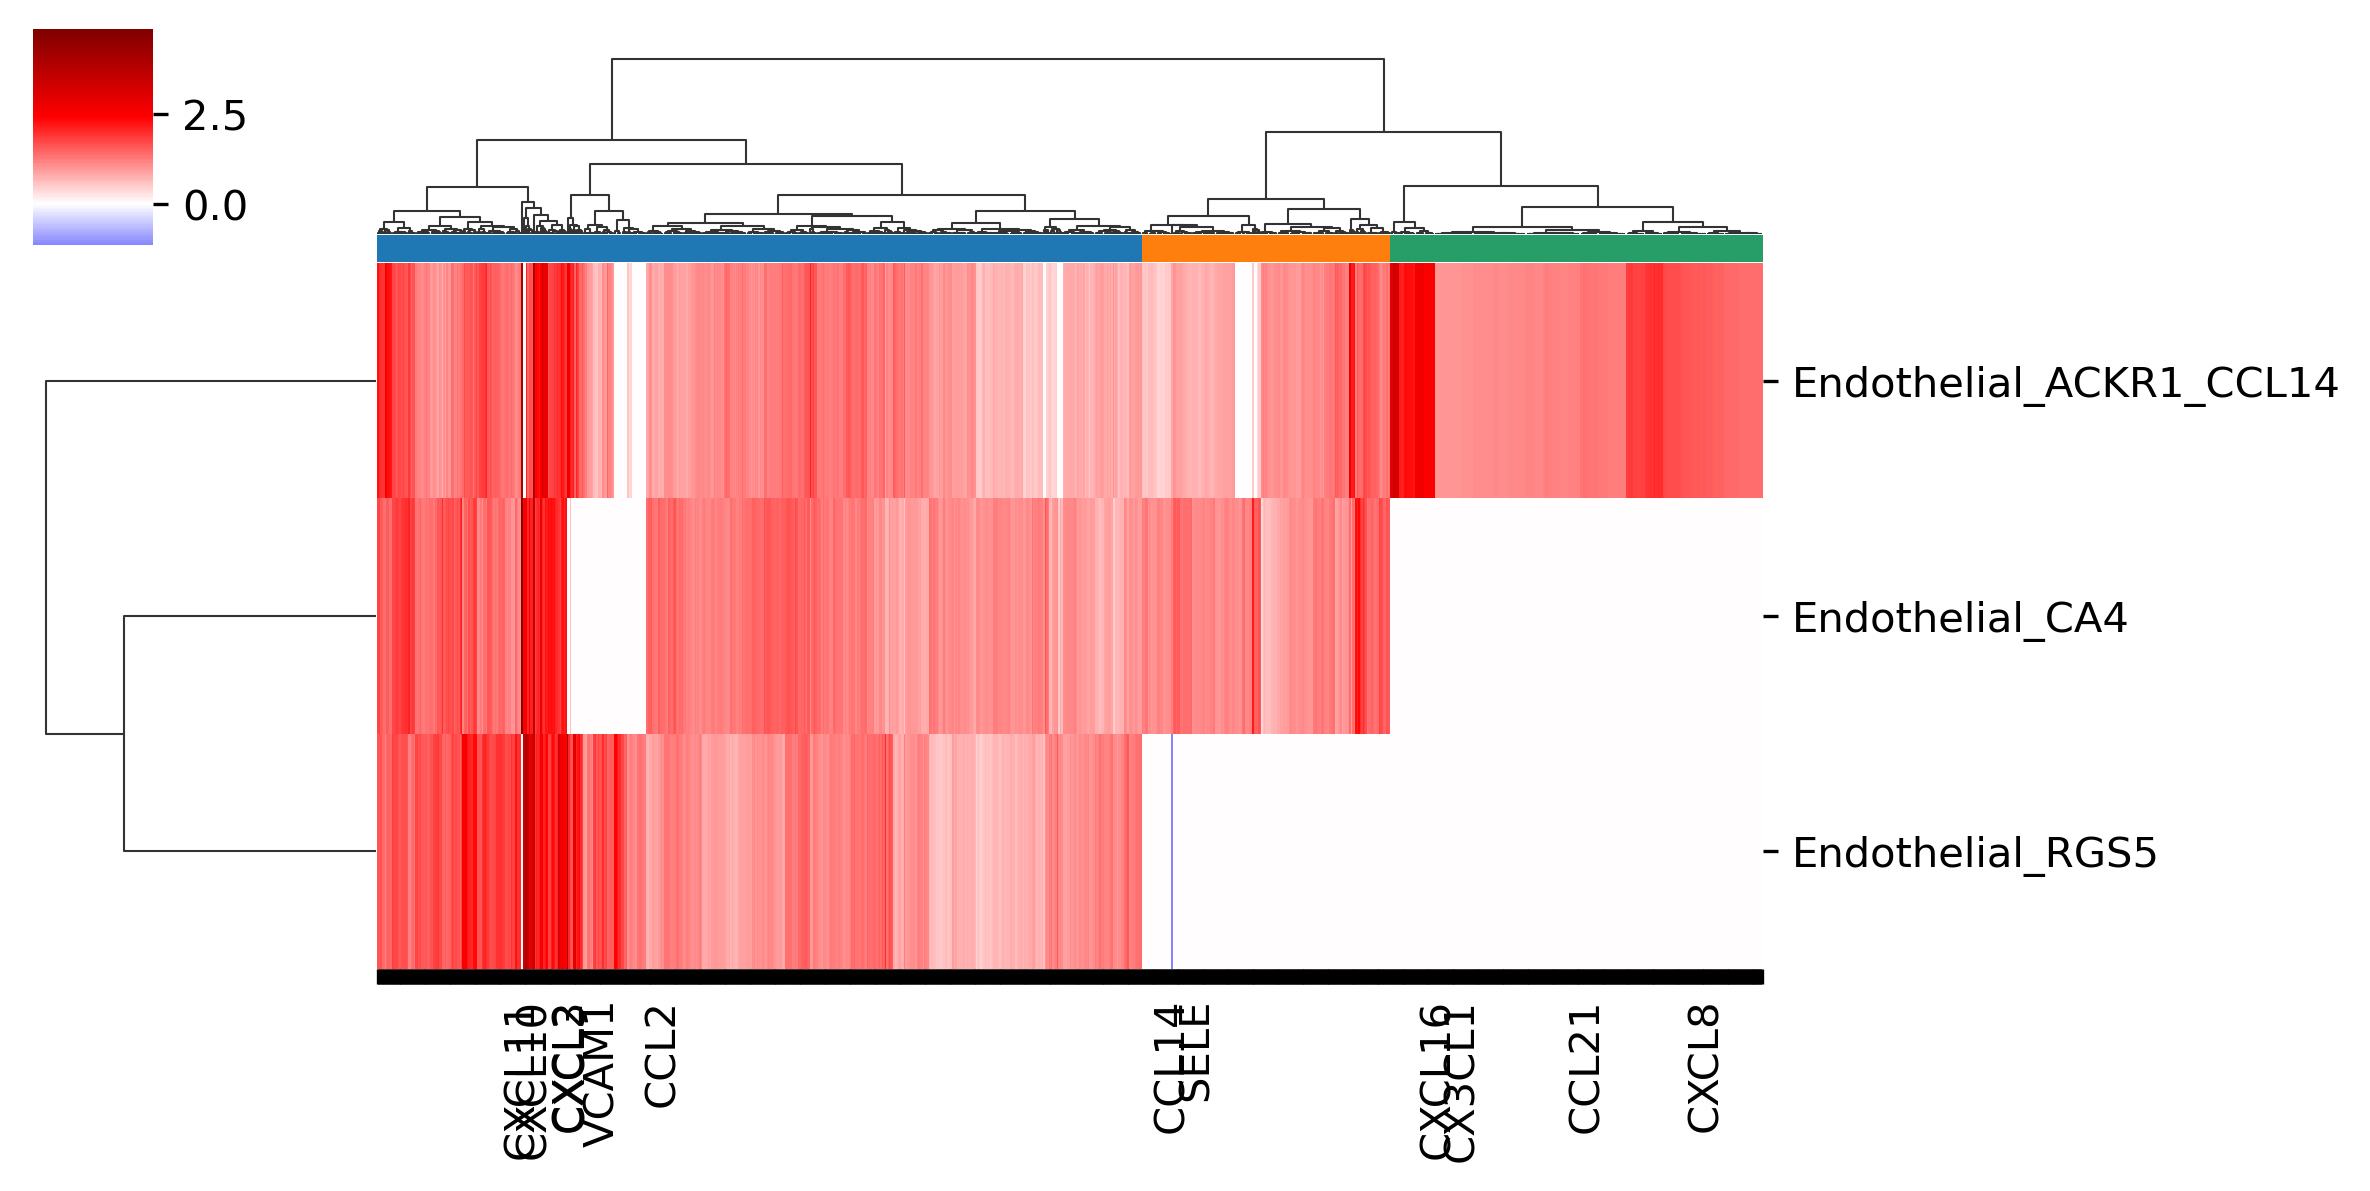

In [10]:
from scipy.cluster.hierarchy import linkage,fcluster
cx_endo_cli_state_logfc_km = np.clip(cx_endo_cli_state_up_logfc,-5,5)
col_linkage = linkage(cx_endo_cli_state_logfc_km.T,method='ward')
col_clusters = fcluster(col_linkage,t=3,criterion='maxclust',depth=2)
# col_clusters = col_clusters[np.argsort(col_clusters)]
col_colors_map = sns.color_palette(n_colors=3)
col_colors = [col_colors_map[i-1] for i in col_clusters]
# cx_endo_cli_state_logfc_km = cx_endo_cli_state_logfc.iloc[:,np.argsort(col_clusters)]
xticklabels = np.array([None]*len(cx_endo_cli_state_logfc_km.columns))
xticklabels[[list(cx_endo_cli_state_logfc_km.columns).index(gene) for gene in ['CXCL11','CXCL10','CXCL2','CXCL3','CXCL8','CXCL16','CCL14','CCL2','CCL21','CX3CL1','VCAM1','SELE']]] = ['CXCL11','CXCL10','CXCL2','CXCL3','CXCL8','CXCL16','CCL14','CCL2','CCL21','CX3CL1','VCAM1','SELE']
g = sns.clustermap(cx_endo_cli_state_logfc_km,col_colors=col_colors,col_linkage=col_linkage,yticklabels=True,cmap='seismic',center=0,figsize=(8,4),col_cluster=True,row_cluster=True,xticklabels=xticklabels)
plt.savefig('cx_endo_results/clustermap_cx_endo_cli_state_up_logfc_fillzero.pdf',bbox_inches='tight',dpi=300)

/home/qukun/xuhao/miniconda3/envs/sjs/lib/python3.9/site-packages/seaborn/matrix.py:1205: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(**tight_params)


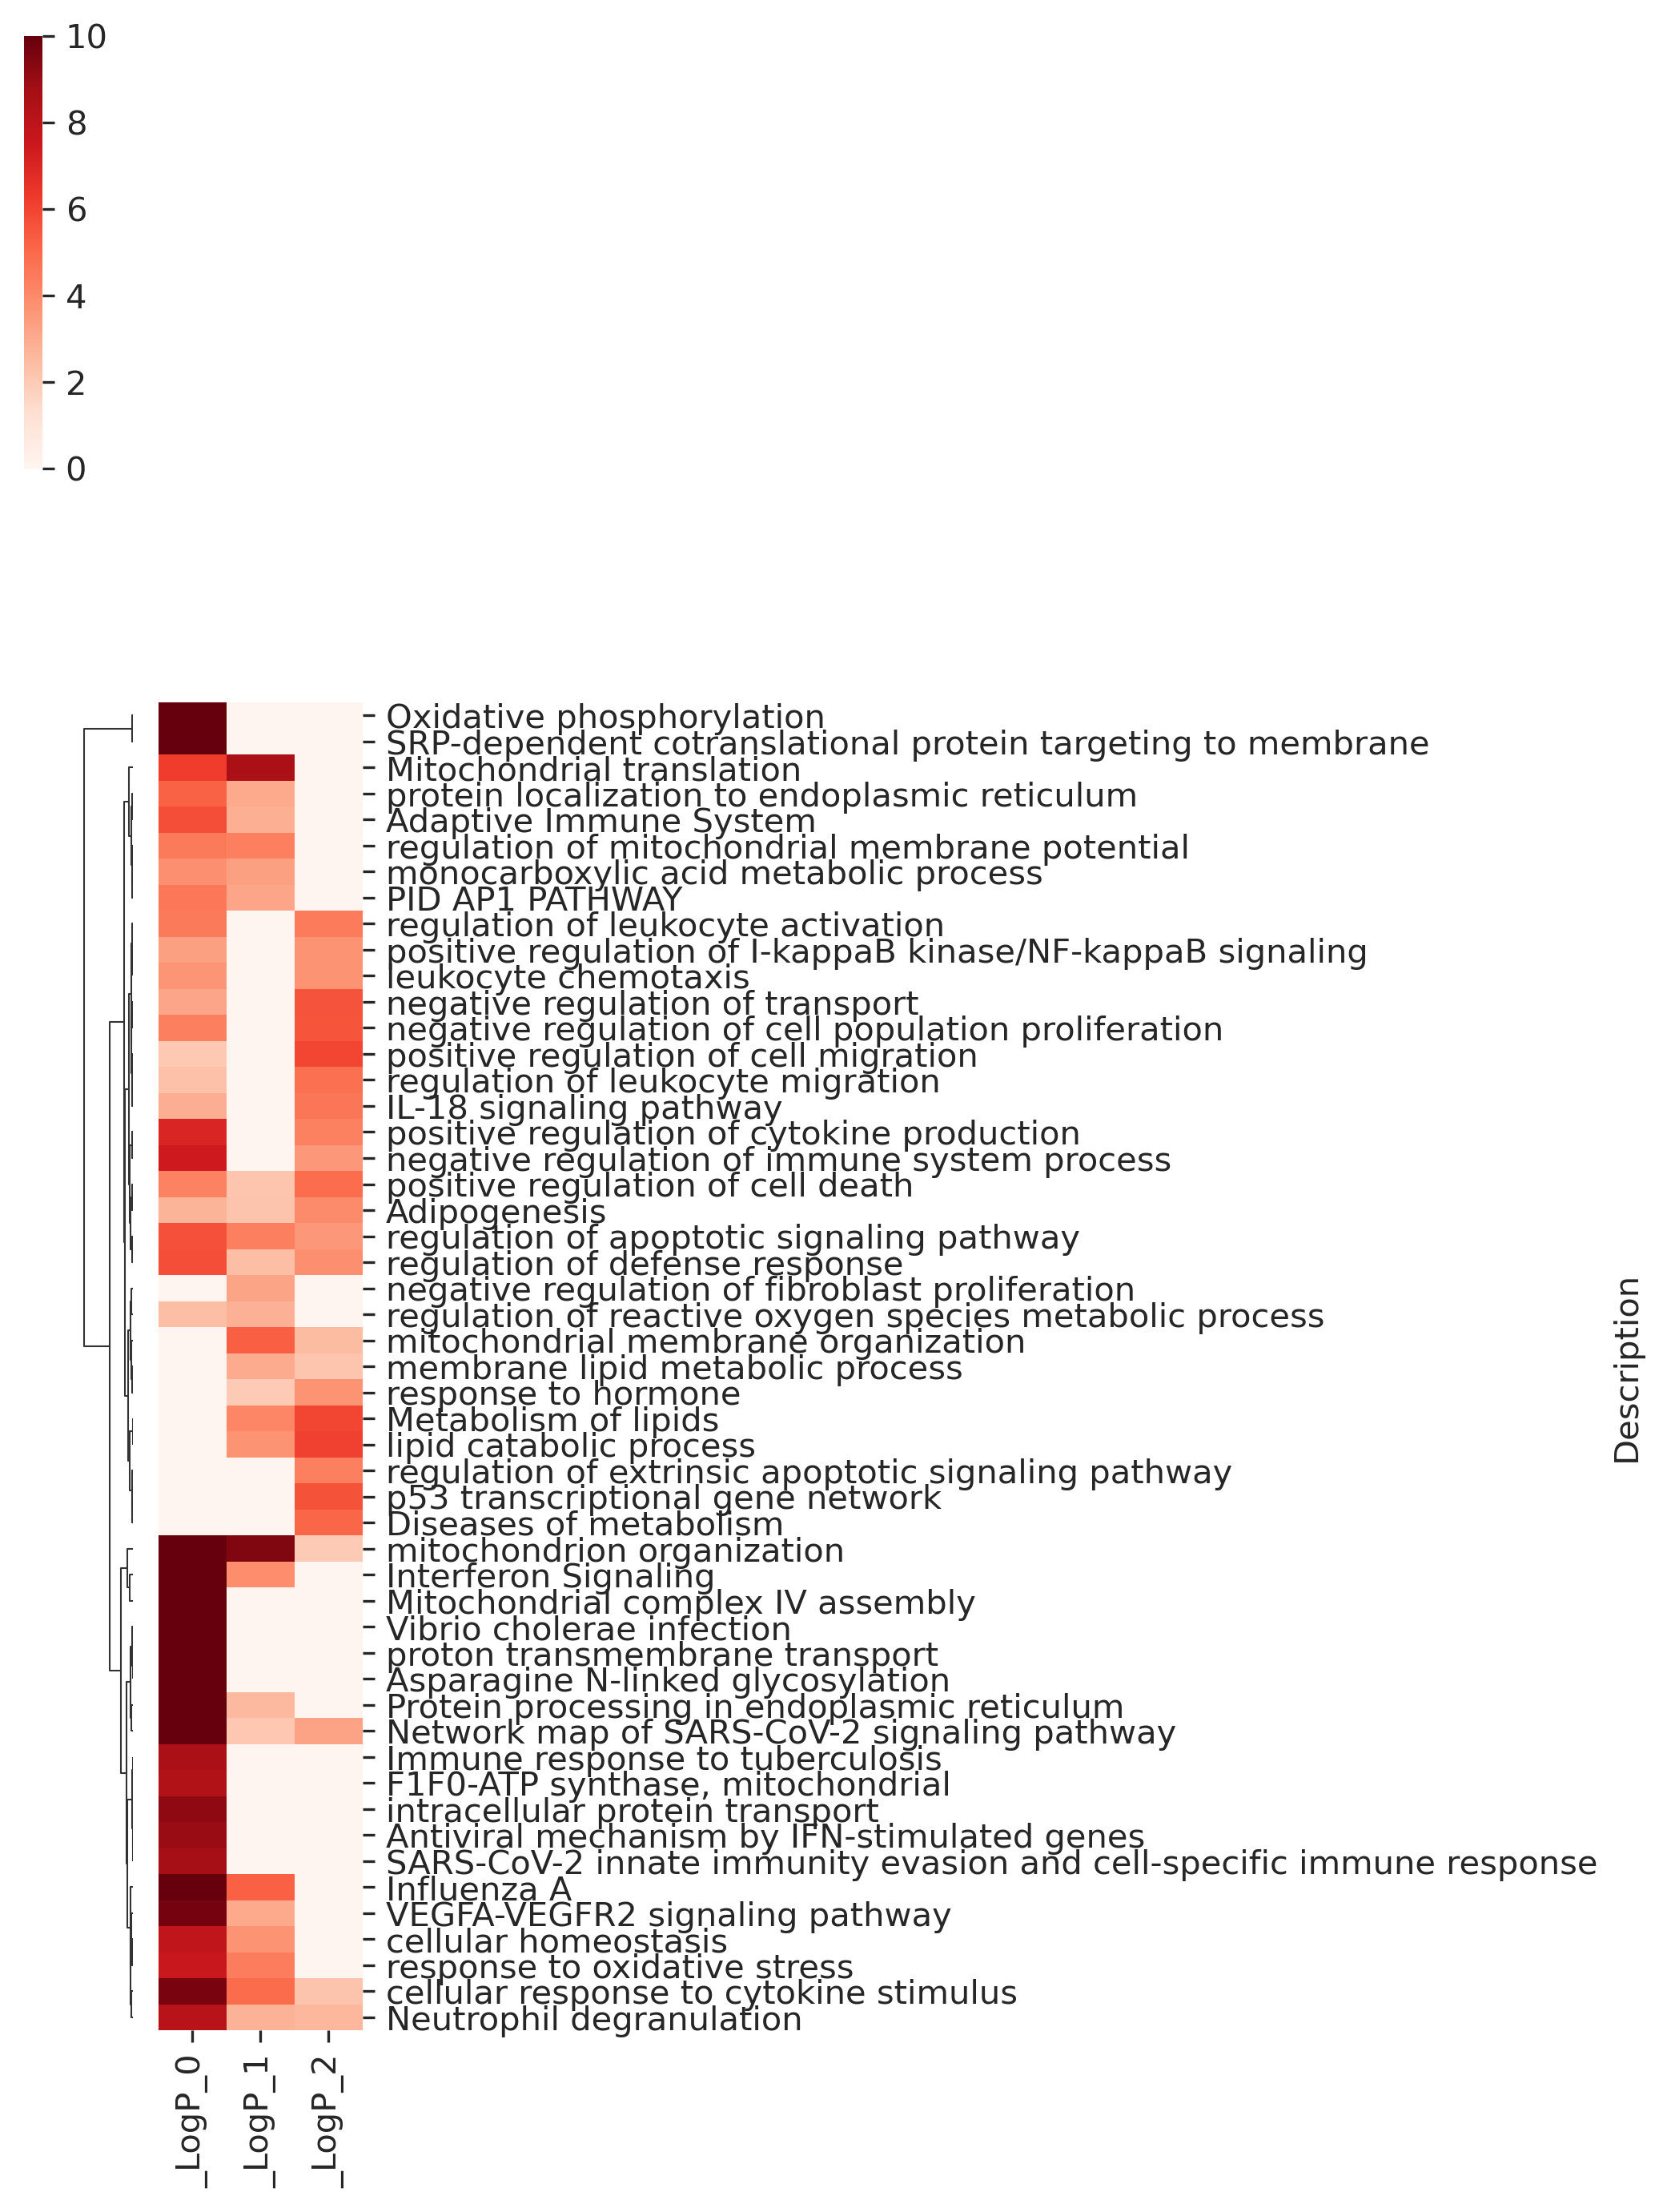

In [128]:
go_heatmap = pd.read_csv('cx_endo_results/s09_endo_minor_up_deg_logfc1_df_HeatmapSelectedGOTop100.csv',index_col=1).iloc[:,1:]
go_heatmap = go_heatmap.iloc[np.unique(np.argsort(go_heatmap.values,axis=0)[:20].reshape(-1)),:]
go_df_list = []
for c in go_heatmap.columns:
    go_df_list.append(go_heatmap.sort_values(by=c).head(20))
go_top20 = pd.concat(go_df_list,axis=0).drop_duplicates()
sns.clustermap(-go_top20,cmap='Reds',vmax=10,figsize=(1.5,10),yticklabels=True,col_cluster=False,method='ward')
plt.savefig('cx_endo_results/clustermap_endo_minor_up_deg_logfc1_go_top20.pdf',bbox_inches='tight')

In [16]:
leukocyte_migration = pd.read_csv('../scripts/CX_20211030/cx_endo_results/GO_regulated_leucytes_migration.txt',sep='\t',index_col=0,header=None)
sc.tl.score_genes(cx_endo,leukocyte_migration[1].values,use_raw=False,score_name='leucytes_migration')
cx_endo.obs['leucytes_migration_mean'] = cx_endo[:,np.intersect1d(leukocyte_migration[1].values,cx_endo.var_names)].X.toarray().mean(axis=1)

computing score 'leucytes_migration'


/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'leucytes_migration', score of gene set (adata.obs).
    840 total control genes are used. (0:00:00)


In [17]:
pd.concat([cx_endo.to_df().loc[:,['RGCC','CA4','SLC9A3R2','CXCL12','GSN','ACKR1','CCL14','CLU','SELP','SELE','GJA4','CALD1','LGALS1','NDUFA4L2','GUCY1A1']],cx_endo.obs[['leucytes_migration_mean']]]).to_csv('source_data/source_data_fig3e&sfig3a.csv')

... storing 'cli_celltype' as categorical


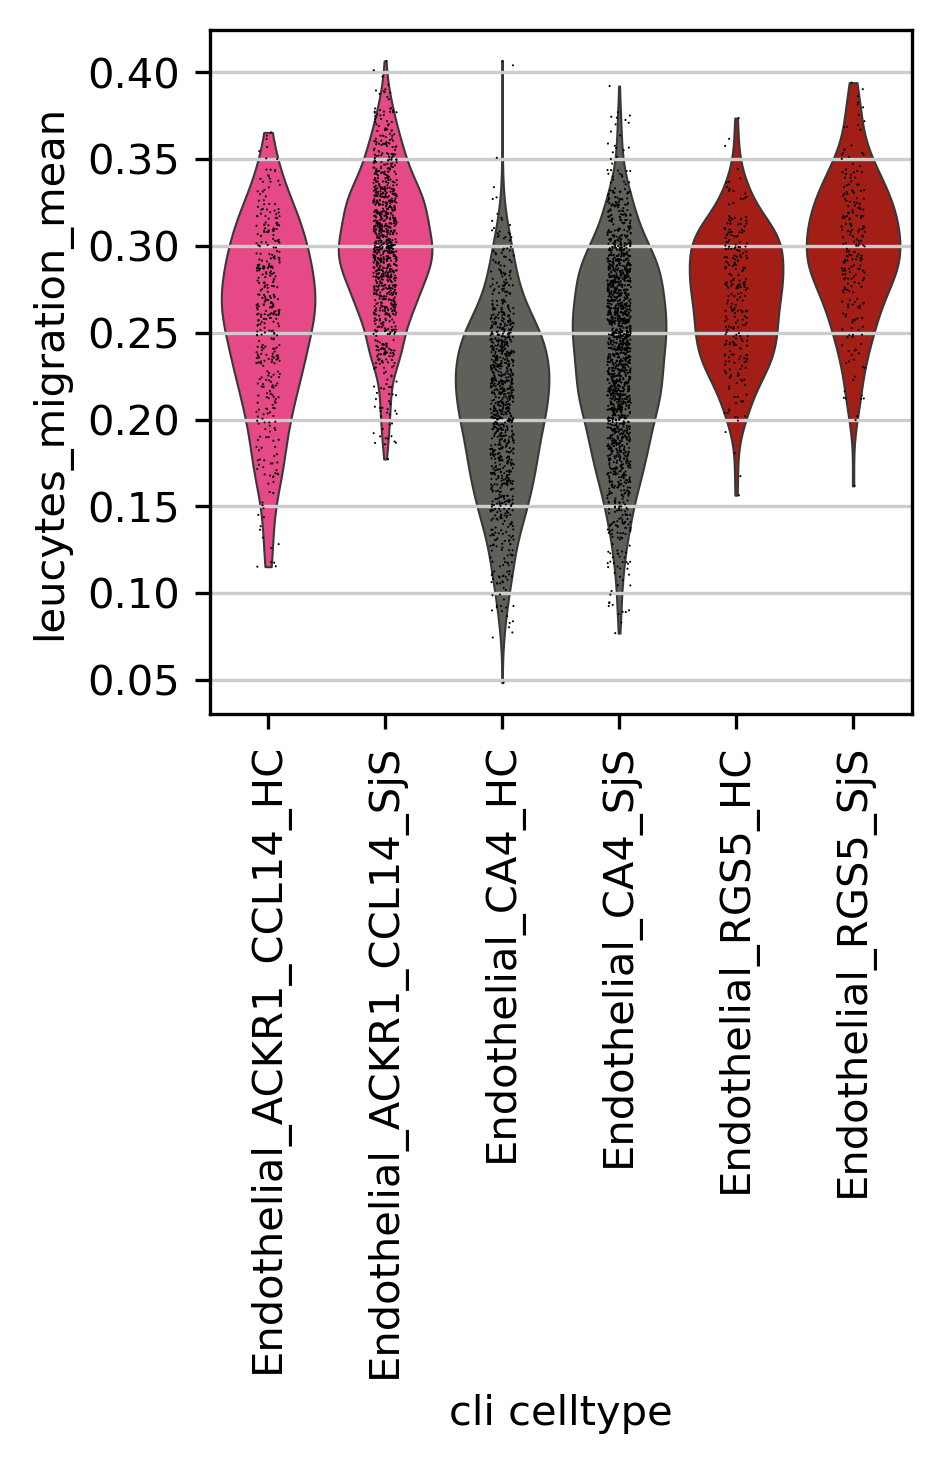

In [12]:
fig,ax=plt.subplots(figsize=(3,3))
sc.pl.violin(cx_endo,'leucytes_migration_mean',groupby='cli_celltype',use_raw=False,show=False,linewidth=.5,ax=ax,palette=np.repeat(cx_endo.uns['celltype_minor_colors'],2),size=.5,)
plt.xticks(rotation=90)
plt.savefig('cx_endo_results/violinplot_leucytes_migration_mean_cli_celltype.pdf',bbox_inches='tight')

In [ ]:
phate_operator = phate.PHATE(n_jobs=14, k=20)
Y_phate = phate_operator.fit_transform(cx_endo.obsm['X_harmony'])

In [8]:
cx_endo.obsm['X_phate'] = Y_phate.astype(np.float32)

In [9]:
phate_df = pd.DataFrame(Y_phate, index=cx_endo.obs_names, columns=['phate_1','phate_2'])

In [24]:
phate_df = pd.read_csv('../scripts/CX_20211030/s09_cx_endo_phate.csv',index_col=0)

In [25]:
cx_endo.obsm['X_phate'] = phate_df.values.astype(np.float32)

In [26]:
cx_endo.uns['celltype_minor_colors'] = ['#F7CCC9','#EEB477','#ED9693']

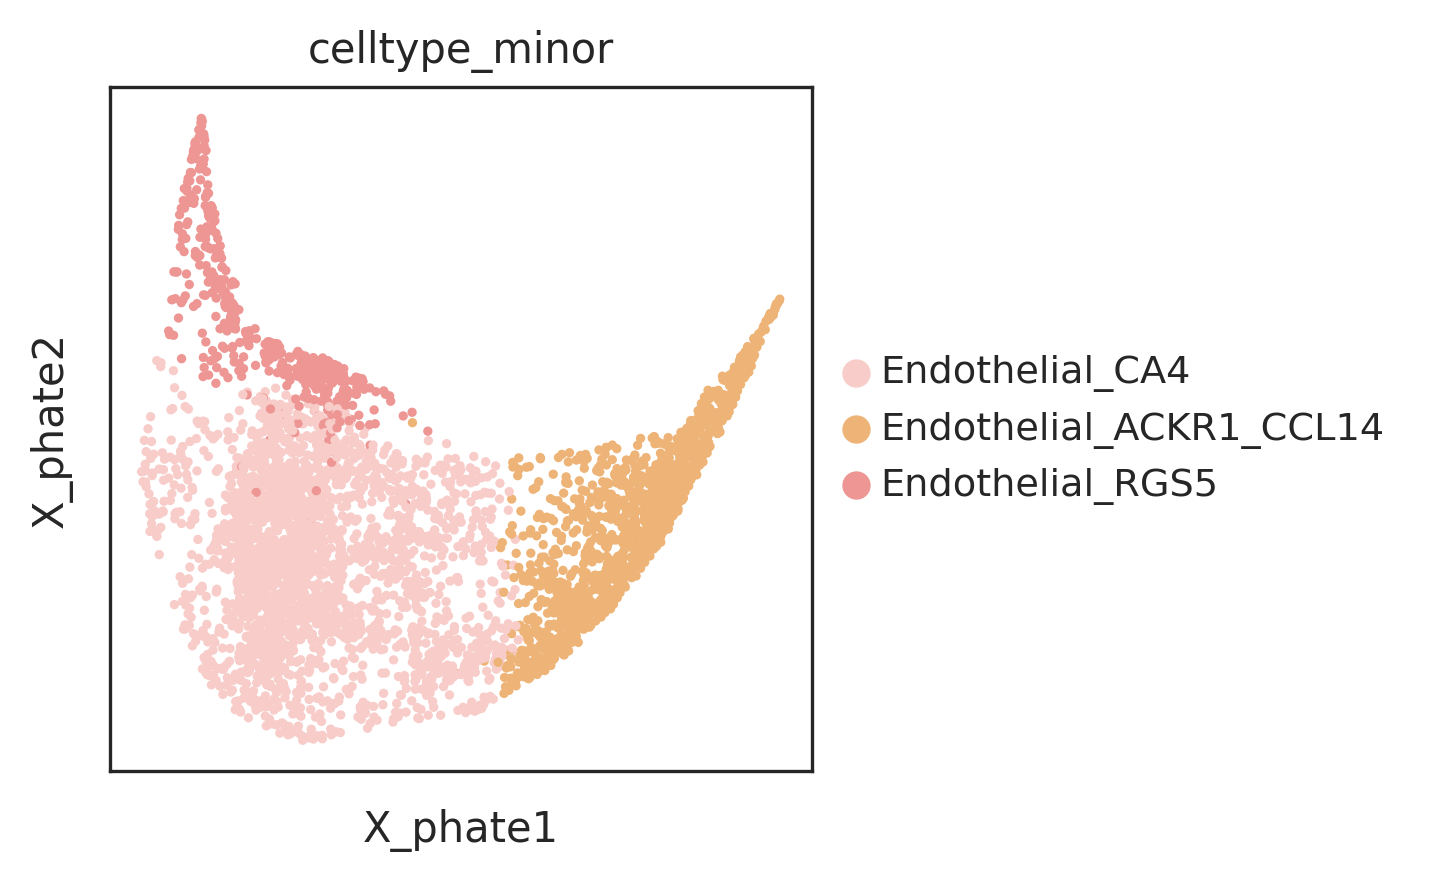

In [150]:
sc.pl.embedding(cx_endo, 'X_phate',color='celltype_minor',s=20)

In [27]:
start_cell = cx_endo.obs_names[np.where(cx_endo.obs.celltype_minor=='Endothelial_CA4')[0][10]]

In [28]:
pr_res = sc.external.tl.palantir_results(cx_endo, start_cell, ms_data='X_phate',num_waypoints=500, n_jobs=4, scale_components=True, use_early_cell_as_start=False, max_iterations=25)

Palantir computing waypoints..
Sampling and flocking waypoints...
Time for determining waypoints: 0.006313093503316243 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Time for shortest paths: 1.7104644616444906 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9996
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...


/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/palantir/core.py:379: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cells = [pseudotime[i].idxmax() for i in nx.connected_components(graph)]
/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/palantir/core.py:379: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cells = [pseudotime[i].idxmax() for i in nx.connected_components(graph)]
/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/palantir/core.py:379: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cells = [pseudotime[i].idxmax() for i in nx.connected_components(graph)]


Computing fundamental matrix and absorption probabilities...


/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/palantir/core.py:447: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ent = ent.append(pd.Series(0, index=terminal_states))
/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/palantir/core.py:450: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branch_probs = branch_probs.append(bp.loc[:, branch_probs.columns])


Project results to all cells...


In [29]:
cx_endo.obs['pseudotime'] = pr_res.pseudotime

In [19]:
phate_df.columns=['x','y']

In [30]:
cx_endo.obs.loc[(pr_res.branch_probs.iloc[:,0] > pr_res.branch_probs.iloc[:,1]),'branch'] = 'branch_RGS5'
cx_endo.obs.loc[(pr_res.branch_probs.iloc[:,0] < pr_res.branch_probs.iloc[:,1]),'branch'] = 'branch_ACKR1'

In [31]:
cx_endo.obs[['phate_1','phate_2']] = cx_endo.obsm['X_phate']

In [33]:
cx_endo.obs[['phate_1','phate_2','pseudotime','branch','cli_state','leucytes_migration_mean','celltype_minor']].to_csv('source_data/source_data_fig3ghi&sfig3ef.csv')

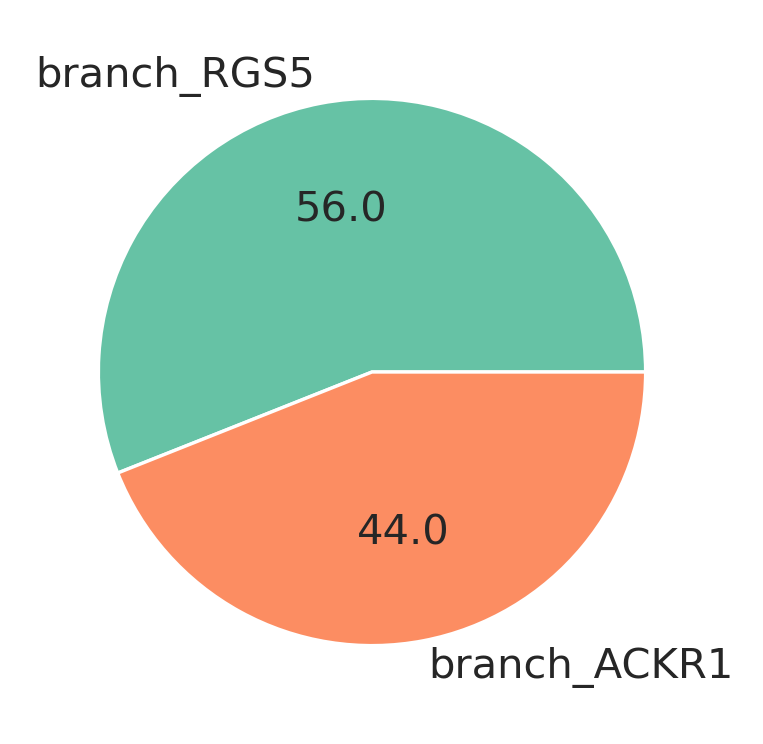

In [143]:
data = cx_endo.obs[cx_endo.obs['cli_state']=='SjS']['branch'].value_counts()/cx_endo.obs[cx_endo.obs['cli_state']=='SjS']['branch'].value_counts().sum()
# plt.pie(data,labels=data.index,colors=[cx_endo.uns['celltype_minor_colors'][-1],cx_endo.uns['celltype_minor_colors'][0]])
plt.pie(data,labels=data.index,colors=sns.color_palette('Set2',n_colors=3),autopct='%.1f')
plt.savefig('cx_endo_palantir_SjS_branch_proportion.pdf',bbox_inches='tight')

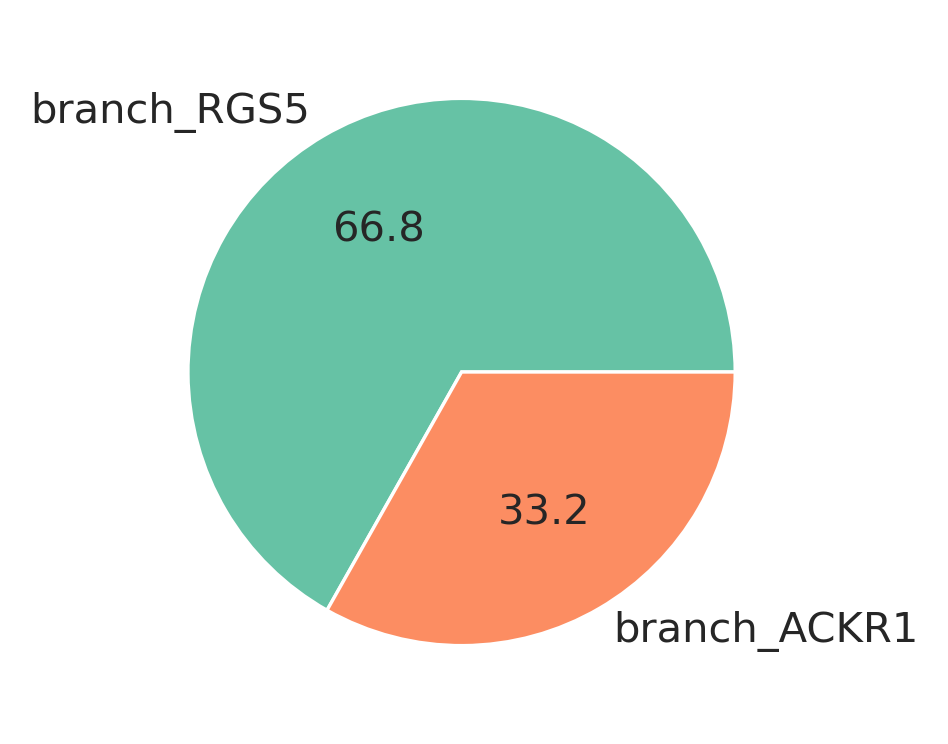

In [142]:
data=cx_endo.obs[cx_endo.obs['cli_state']=='HC']['branch'].value_counts()/cx_endo.obs[cx_endo.obs['cli_state']=='HC']['branch'].value_counts().sum()
plt.pie(data,labels=data.index,colors=sns.color_palette('Set2',n_colors=3),autopct='%.1f')
plt.savefig('cx_endo_palantir_HC_branch_proportion.pdf',bbox_inches='tight')

/home/qukun/xuhao/miniconda3/envs/sjs/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'branch' as categorical


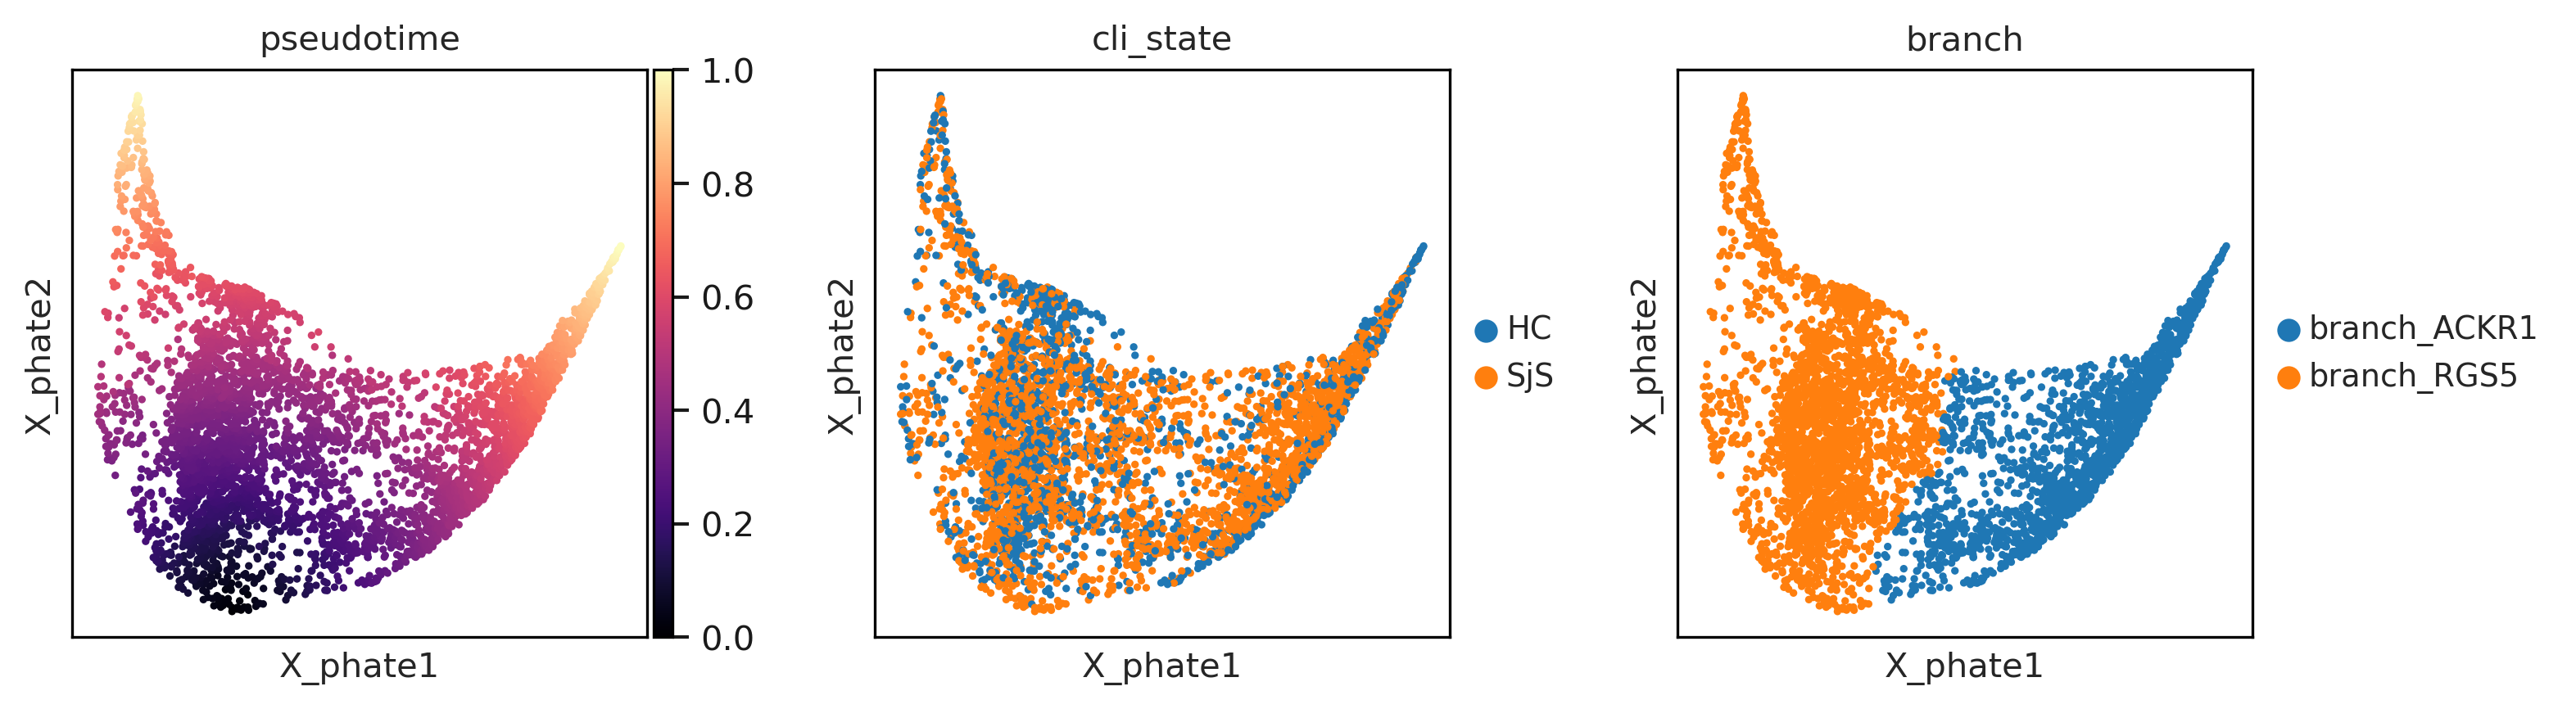

In [144]:
sc.pl.embedding(cx_endo[np.random.permutation(cx_endo.obs_names)], 'X_phate',color=['pseudotime','cli_state','branch'],cmap='magma',s=20,save='_phate_palantir_cli_state_branch.pdf')

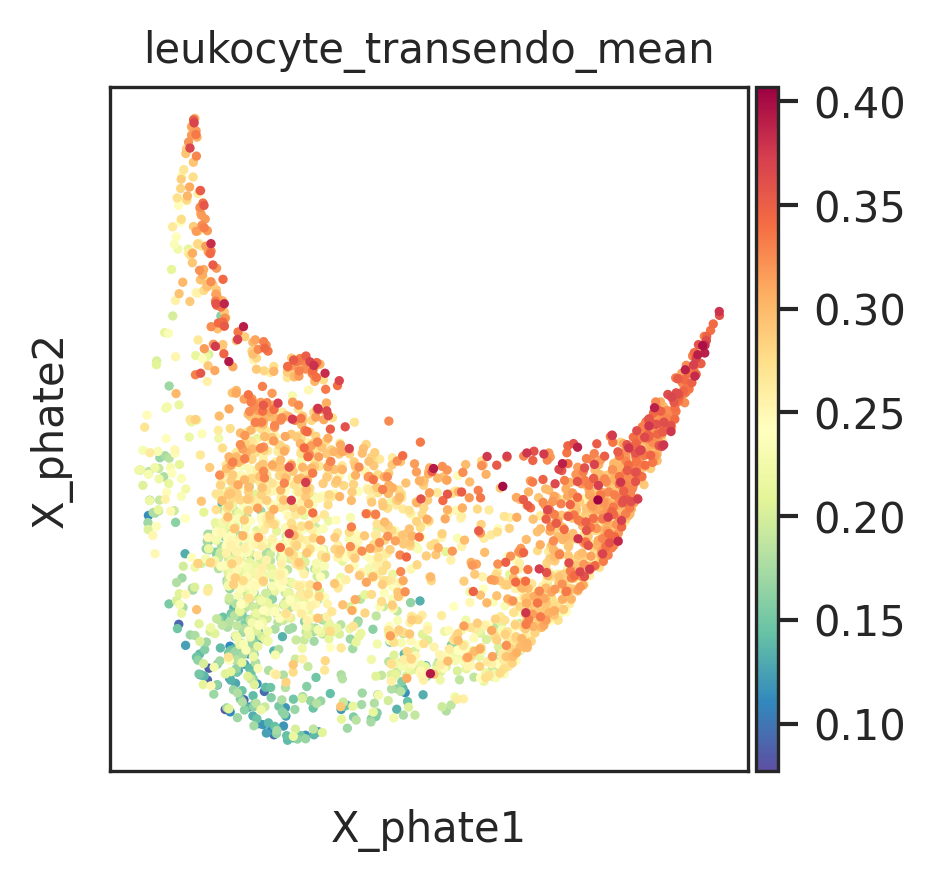

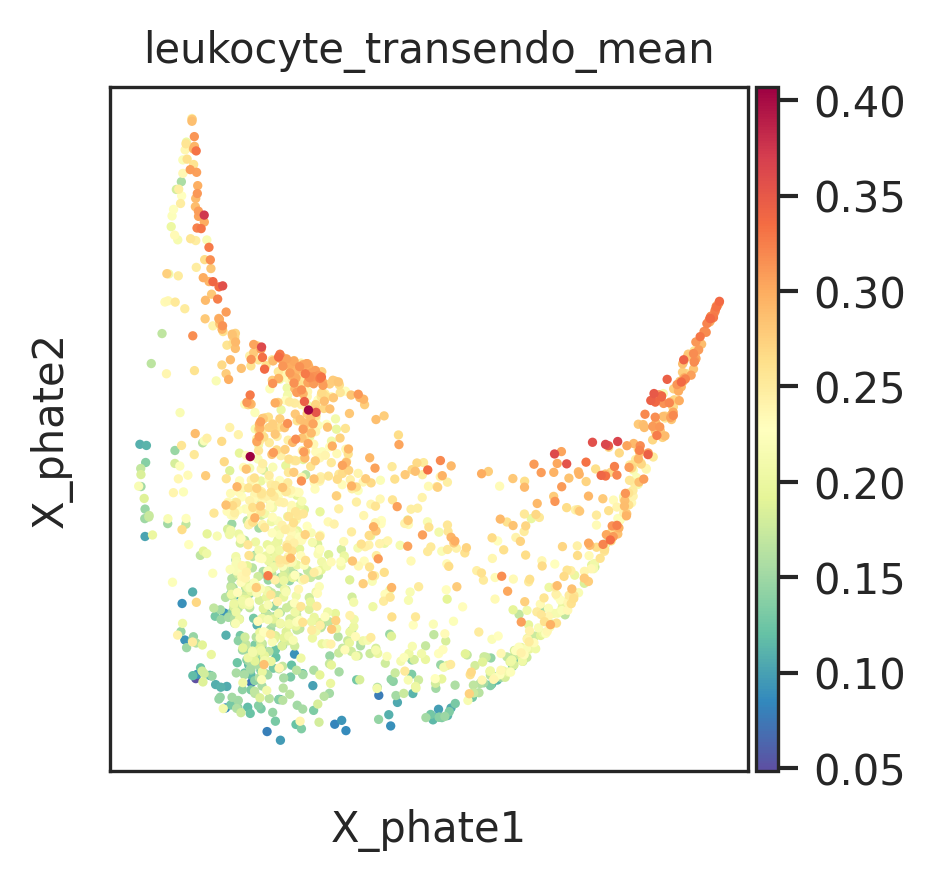

In [148]:
sc.pl.embedding(cx_endo[cx_endo.obs.cli_state=='SjS'], 'X_phate',color=['leukocyte_transendo_mean'],s=20,cmap='Spectral_r',save='_cx_endo_pseudotime_pss_leukocytes_migration_mean.pdf')
sc.pl.embedding(cx_endo[cx_endo.obs.cli_state=='HC'], 'X_phate',color=['leukocyte_transendo_mean'],s=20,cmap='Spectral_r',save='_cx_endo_pseudotime_ctrl_leukocytes_migration_mean.pdf')